# Анализ гипотез для увеличения выручки интернет-магазина 

<b>Описание проекта:</b>
<br>Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки компании.</br>
<br>Предстоит провести приоритизацию гипотез, запустить A/B-тест и проанализировать результаты. </br>
<br>Выдвинуты 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.</br>
<br>Был проведён A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv</br>

### Изучение данных и подготовка их к анализу

#### Открытие и изучение файлов

In [1]:
# Импортируем необходимые библиотеки 
import pandas as pd
import scipy.stats as stats
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()


In [2]:
#загружаем данные из файлов в датафреймы
hypothesis  = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
# выводим первые 5 строк каждого датафрейма и изучим данные
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Представленный датафрейм невелик. Названия столбцов нужно привести к нижнему регистру. Отсутствующие или аномальные значения отсутствуют. 5 столбцов. Необходимые параметры присутствуют. Можно использовать в дальнейшем анализе. Оценки проставлены от 1 от 10 

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Формат соответствующий

In [4]:
# откроем файл orders
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Датасет состоит из 5 столбцов. Формат названий столбцов подходящий

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропущенных значений нет.

In [6]:
# выведем 5 строк датасета visitors
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропущенных значений нет. 

#### Построение общих гистограмм

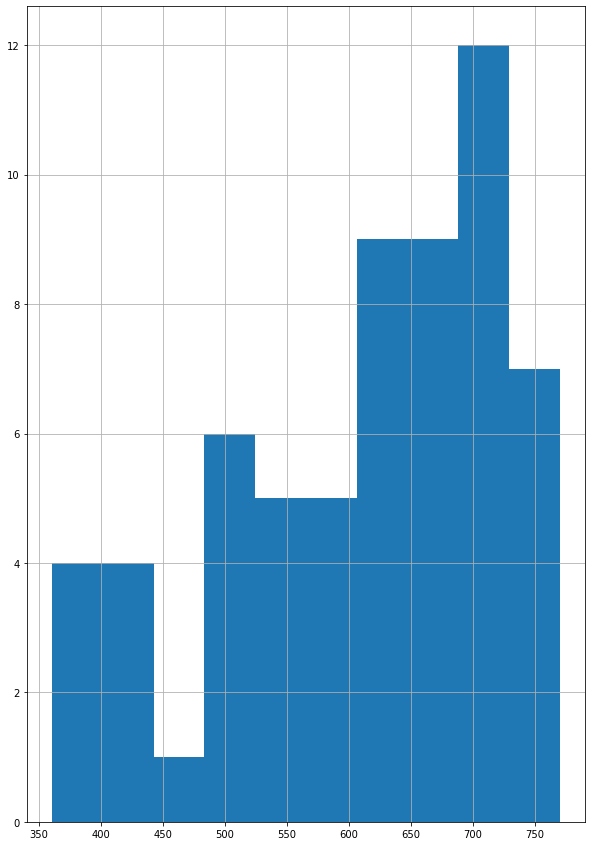

In [8]:
visitors['visitors'].hist(figsize=(10,15))
plt.show()

Видно, что диапазон посетителей на каждую дату распределён от ~360 до ~780. Выбивающихся значений нет. БОльшая часть строк имеют количество посетителей в районе 700 в день. Меньшая в районе 450-475 человек в день.

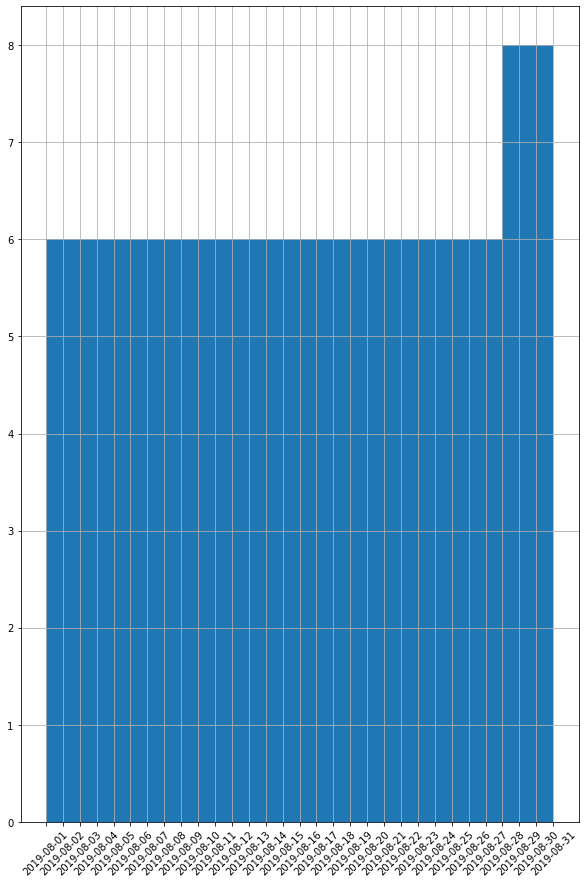

In [9]:
visitors['date'].hist(figsize=(10,15))
plt.xticks(rotation = 45)
plt.show()

In [10]:
visitors['date'].min()

'2019-08-01'

In [11]:
visitors['date'].max()

'2019-08-31'

Видно, что данные по датам распределены относительно равномерно по 6 строк. Кроме, увеличения количества строк в конце августа

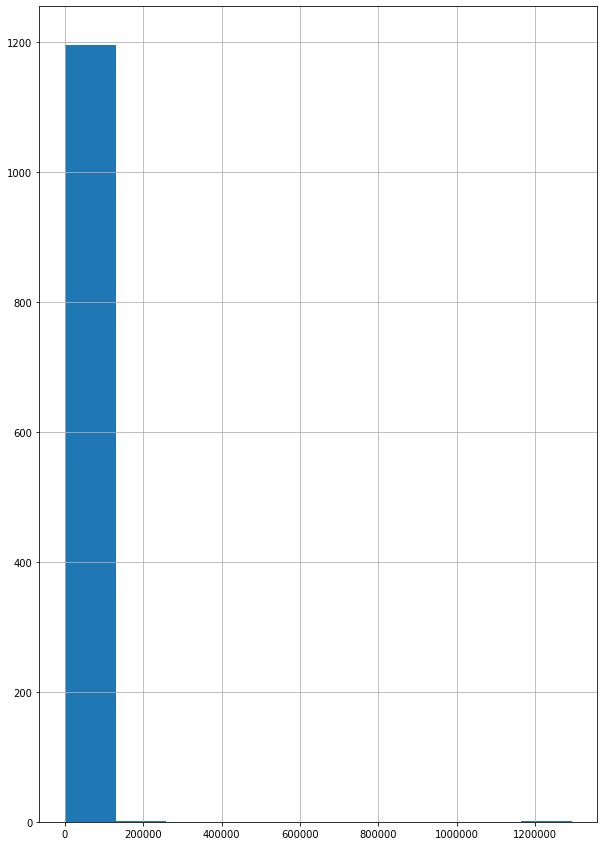

In [12]:
orders['revenue'].hist(figsize=(10,15))
plt.ticklabel_format(style='plain')
plt.show()

Видно, что основной диапазон значений в столбце "выручка с заказа" колеблется от 0 до ~160 000. Также, есть небольшое количество заказов в диапазоне от ~160 000 до 220 000. Небольшое количество аномально больших заказов в диапазоне от ~ 1 180 000 до ~1 300 000. Необходимо проверить данные значения. 

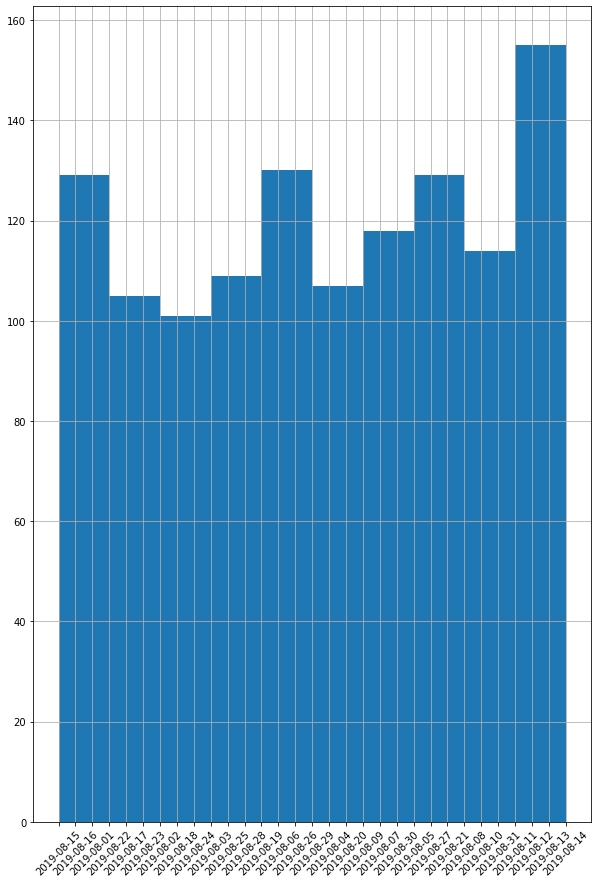

In [13]:
orders['date'].hist(figsize=(10, 15))
plt.xticks(rotation = 45)
plt.show()

In [14]:
orders['date'].min()

'2019-08-01'

In [15]:
orders['date'].max()

'2019-08-31'

Данные представлены в диапазоне от 1 августа 2019 года до 31 августа 2019 года. Больше всего строк со значениями в конце августа

#### Вывод:

Все 3 датасета представлены корректно. Отсутствующих значений нет. Среди некатегориальных числовых значений присутствует разброс в таблице orders. Необходимо проверить выбивающиеся значения на этапе предобработки.
Типы данных корректные

### Предобработка данных

#### Приведение данных к нужному типу

In [16]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Нужные типы данных установлены

#### Приведение к нижнему регистру

In [19]:
hypothesis.columns = hypothesis.columns.str.lower()

In [20]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


#### Проверка дубликатов

In [21]:
# для начала проверим явные дубликаты
print('Количество дубликатов в orders', orders.duplicated().sum())
print('Количество дубликатов в visitors', visitors.duplicated().sum())

Количество дубликатов в orders 0
Количество дубликатов в visitors 0


Явных дубликатов нет

Проверим дубликаты в файле visitors по 2-м столбцам date и group

In [22]:
# определим индексы строк дубликатов
duplicates = visitors.duplicated(subset=['date','group'])\
.loc[visitors.duplicated(subset=['date','group']) == True].index
print(duplicates)

Int64Index([], dtype='int64')


Дубликатов нет

В файле orders необходимо проверить дубликаты по transactionId, visitorId, date, group          

In [23]:
# определим индексы строк дубликатов
duplicates = orders.duplicated(subset=['transactionId','visitorId', 'date', 'group'])\
.loc[orders.duplicated(subset=['transactionId','visitorId', 'date', 'group']) == True].index
print(duplicates)

Int64Index([], dtype='int64')


Также, дубликаты отсутствуют

Проверим уникальные значения для категориальных данных.

In [24]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [25]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Дубликатов нет

#### Проверка аномальных значений

Проверим столбец revenue в датасете orders

In [26]:
orders.query('revenue > 300000')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


Только одно значение выбивается из общей картины. Вероятно, именно в данном случае, это просто очень большой заказ на 1 294 500


Проверим пользователей, попавших в обе группы


In [27]:
grouped_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()
grouped_users


array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [28]:
orders = orders.query('visitorId not in @grouped_users')

#### Вывод:


Данные представлены максимально корректно. Все типы данных подходящие, кроме типа данных столбцов date. Соотвествующие изменения проведены. Аномальные значения удалены. Пользователи, попавшие в обе группы удалены. Дубликатов явных и неявных нет

### Приоритизация гипотез

#### Применим фреймворк ICE

In [29]:
# создадим новый столбец с показателем ICE для приоритизации
hypothesis['ICE']=(hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [30]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Наиболее перспективные гипотезы с индексами: <br>8 - "Запустить акцию, дающую скидку на товар в день рождения",</br> <br>0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",</br><br> 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" </br> <br>6 - "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"</br>

#### Применим фреймворк RICE

In [31]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


В соответствии с RICE, наиболее перспективные гипотезы с индексами: <br>7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",</br> <br>2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", </br><br> 0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" </br> <br>6 - "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"</br>

Заметны несоответствия в приоритизации гипотез.
<br> На первое место выдвинулась 7 гипотеза вместо 8. На второе место 2 гипотеза вместо 0. На третье 0 вместо 7. На четвертом месте 6 гипотеза без изменений

Это произошло потому что показатель охвата Reach у 7 гипотезы больше остальных. Т.е. она затронет больше пользователей. 2 гипотеза  переместилась с 5 место на 2, также, по причине высокого показателя охвата - 8. 0 гипотеза снизилась, т.к. показатель охвата ниже, чем у других гипотез - 3.

#### Вывод: 

Таким образом, если учитывать показатель охвата, самая перспективная гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". <br>Самая неперспективная - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"

### Анализ A/B теста

#### Анализ кумулятивной выручки по группам.

In [32]:
#создадим датафрейм dates_group с уникальными парами значений 'date' и 'group' таблицы orders
dates_group = orders[['date', 'group']].drop_duplicates()
dates_group

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [33]:
# создадим датафрейм orders_aggregated с необходимой информацией
orders_aggregated = dates_group.apply(lambda x: orders[np.logical_and(orders['date']<=x['date'], orders['group']==x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

orders_aggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [34]:
# создадим датафрейм visitors_aggregated с необходимой информацией
visitors_aggregated = dates_group\
.apply(lambda x: visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitors_aggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [35]:
# зададим переменную cumulative_data объединив новые датафреймы
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [36]:
# переименуем столбцы для удобства
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [37]:
# объявим переменные cumulativeRevenueA и cumulativeRevenueB в которых сохраним информацию о группах 
cumulativeRevenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueA.head()


,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


In [38]:
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


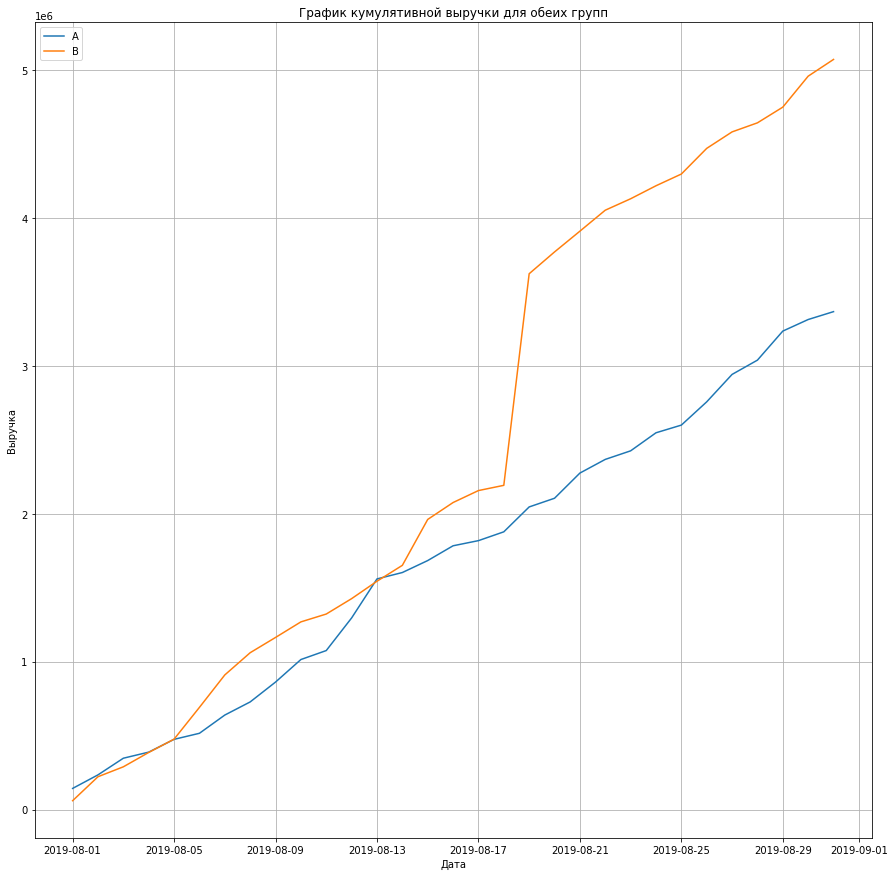

In [39]:
# построим графики кумулятивной выручки для обоих групп
plt.figure(figsize=(15, 15))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.title('График кумулятивной выручки для обеих групп')
plt.show()

На графике видно, что на протяжении всего теста, начиная со второго дня, сегмент B вырвался вперед. 13го августа сегмент А практически догнал сегмент B, но с течением времени, сегмент В увеличил разрыв и лидировал до конца теста с большим разрывом. <br> Вероятно, это произошло по причине аномально большого заказа 19го августа. На финальном этапе анализа необходимо данное значение удалить.  

#### Анализ кумулятивного среднего чека по группам

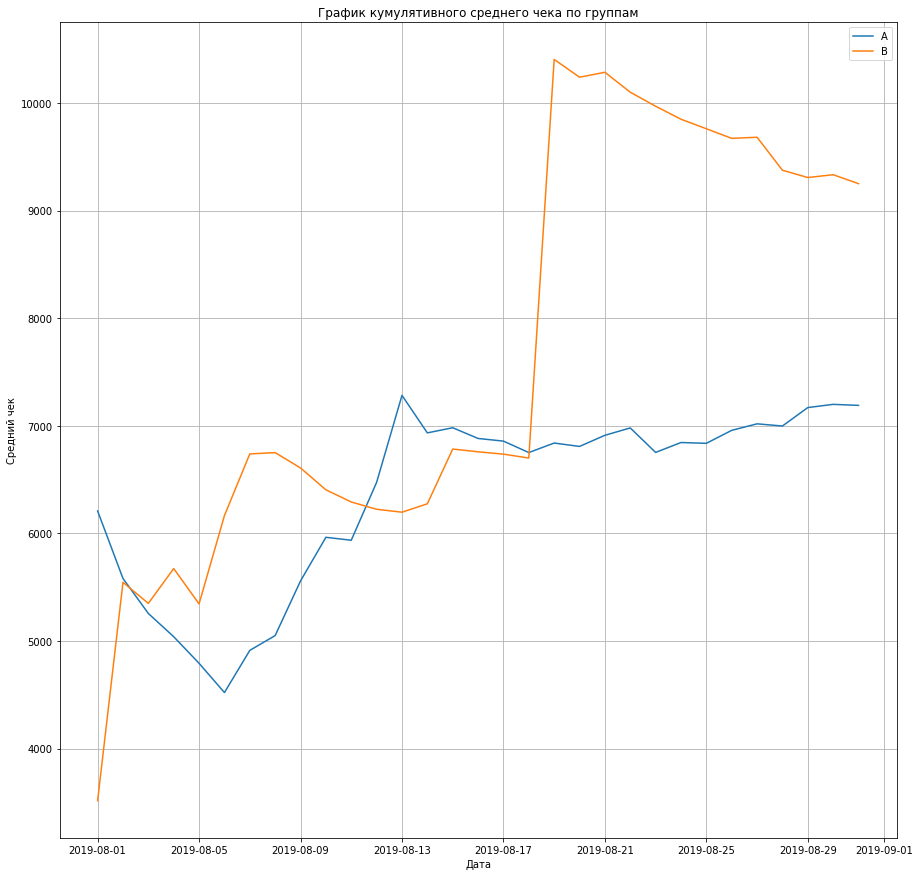

In [40]:
plt.figure(figsize=(15, 15))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.show()

В первый день А лидировал, но, уже на второй день, сегмент В вырвался вперед и лидировал до 11 числа.
<br>По графику сложно сделать определённый вывод, т.к. видны колебания. Но, можно заметить, что, также, 19го августа наблюдается резкий рост среднего чека у группы В. Снова влияние выброса. Необходим дополнительный анализ.

####  Анализ относительного изменения кумулятивного среднего чека группы B к группе A

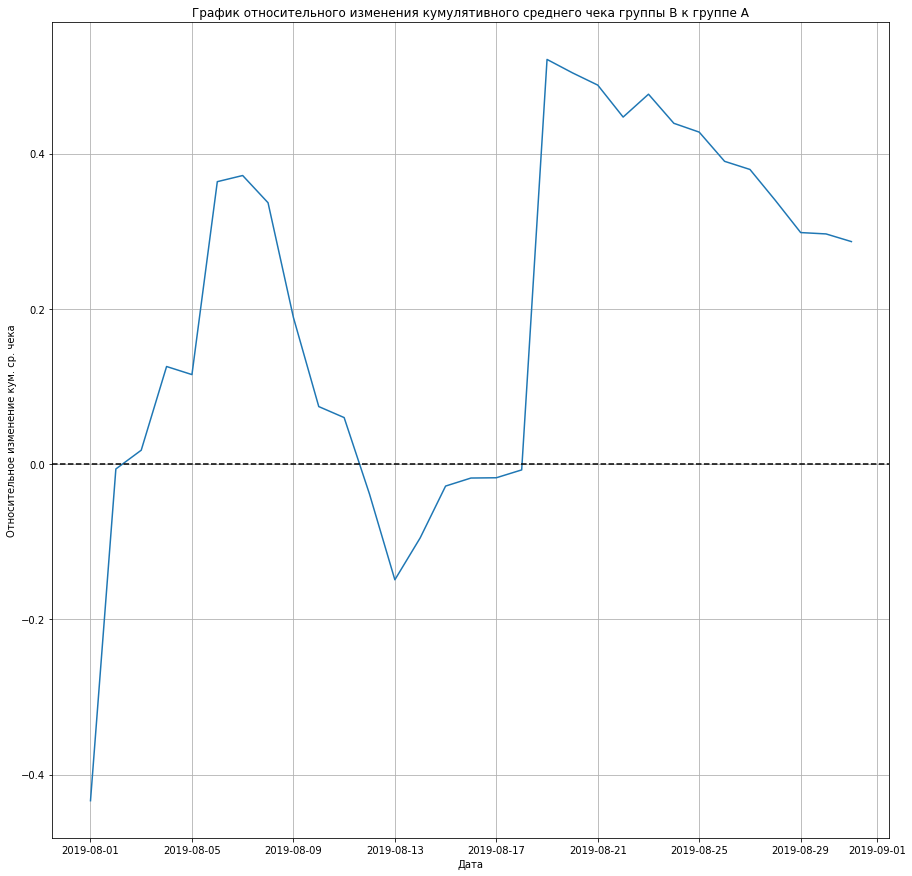

In [41]:
# создадим новый датафрейм merged_cumulative_rev и объединим таблицы
merged_cumulative_rev = cumulativeRevenueA\
.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 15))
plt.plot(merged_cumulative_rev['date'],
         (merged_cumulative_rev['revenueB']/merged_cumulative_rev['ordersB'])\
         /(merged_cumulative_rev['revenueA']/merged_cumulative_rev['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кум. ср. чека')
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.show()

Заметен резкий рост 2го августа, резкое падение 8го августа и резкий рост 19го августа. Вероятно, именно тогда и произошли аномальные заказы.

#### Анализ кумулятивного среднего количества заказов на посетителя по группам.

In [42]:
# создадим новые переменные cumulativeOrdersA и cumulativeOrdersB и добавим столбец buyers
cumulativeOrdersA = cumulative_data[cumulative_data['group']=='A'][['date','visitors', 'orders']]
cumulativeOrdersB = cumulative_data[cumulative_data['group']=='B'][['date','visitors', 'orders']]
cumulativeOrdersA.head()

,date,visitors,orders
0,2019-08-01,719,23
2,2019-08-02,1338,42
4,2019-08-03,1845,66
6,2019-08-04,2562,77
8,2019-08-05,3318,99


In [43]:
cumulativeOrdersB.head()

,date,visitors,orders
1,2019-08-01,713,17
3,2019-08-02,1294,40
5,2019-08-03,1803,54
7,2019-08-04,2573,68
9,2019-08-05,3280,89


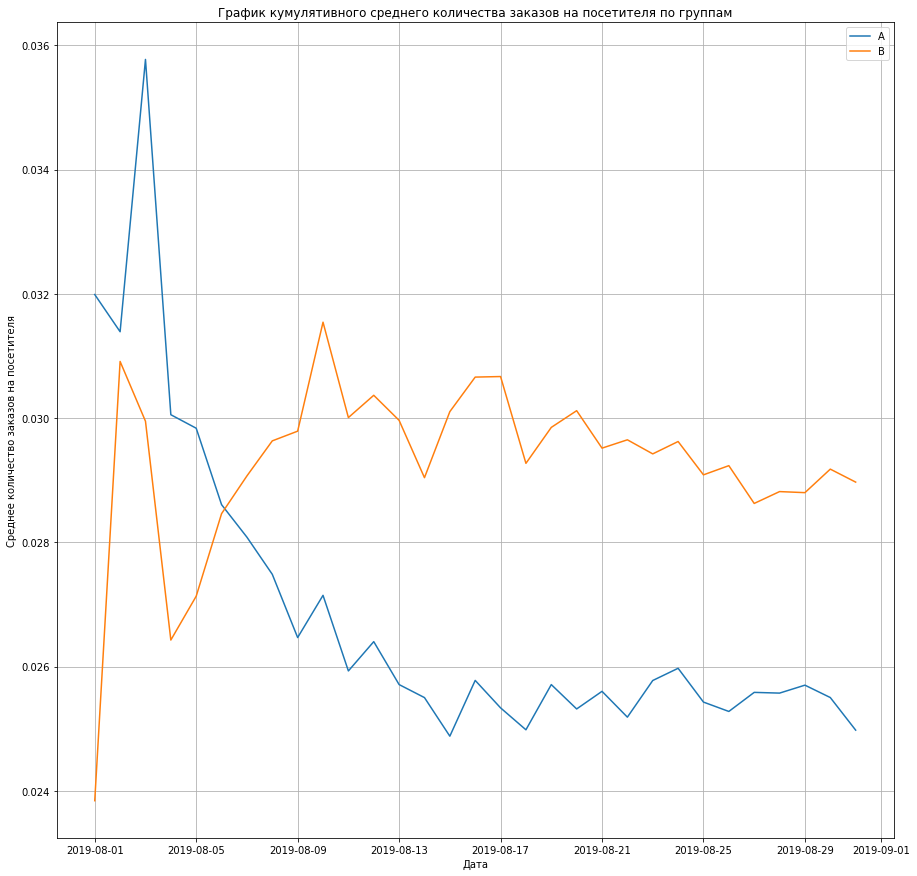

In [44]:
# построим график
plt.figure(figsize=(15, 15))
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'], label='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'], label='B')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.show()

На начальном этапе наблюдались резкие колебания среднего количества заказов на посетителя у обоих групп. Но, с 6 августа стабильно лидировала группа B.

#### Анализ относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

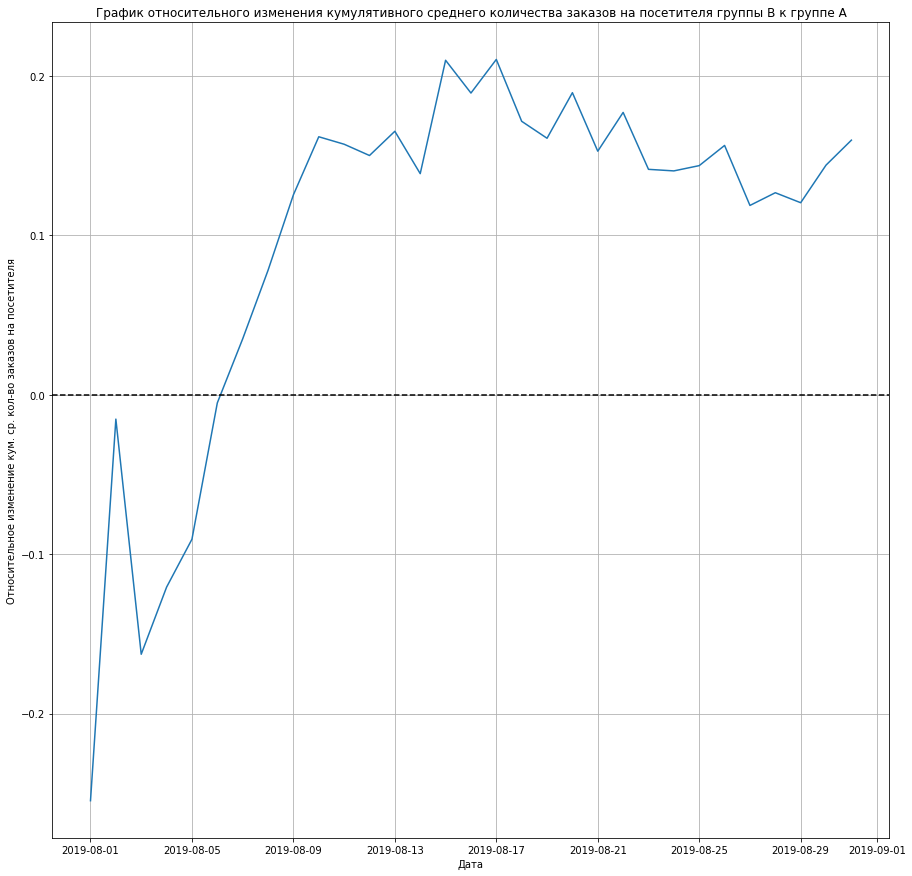

In [45]:
# создадим новый датафрейм merged_cumulative_ord и объединим таблицы
merged_cumulative_ord = cumulativeOrdersA\
.merge(cumulativeOrdersB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 15))
plt.plot(merged_cumulative_ord['date'],
         (merged_cumulative_ord['ordersB']/merged_cumulative_ord['visitorsB'])\
         /(merged_cumulative_ord['ordersA']/merged_cumulative_ord['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кум. ср. кол-во заказов на посетителя')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.show()

В первые дни группа B с колебаниями, отставала от группы А. Но, начиная с 6 августа, Группы В стабильно лидировала в данном показателе.

Можно предположить, что предложение группе В оказалось более интересным с течением времени

#### График количества заказов по пользователям

In [46]:
# создадим датафрейм orders_by_users с 2 столбцами visitorId и transactionId, посчитаем количество заказов и отсортируем
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
    .sort_values(by='transactionId', ascending=False)
)
orders_by_users.columns = ['visitorId', 'orders']
orders_by_users

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


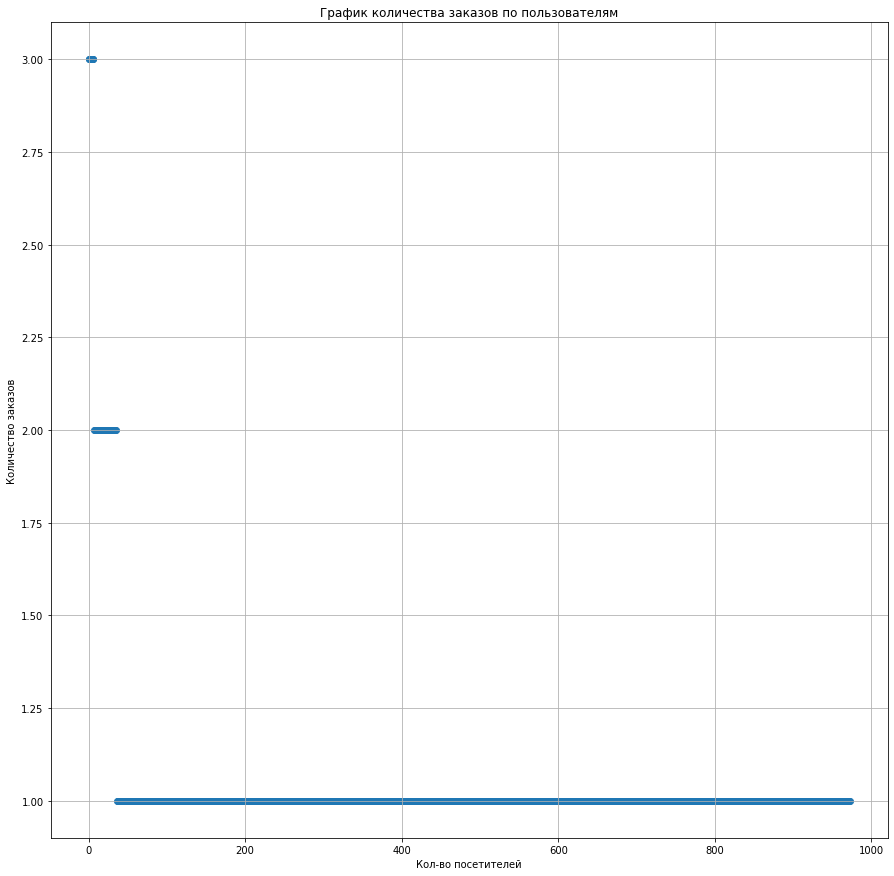

In [47]:
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(15, 15))
plt.scatter(x_values, orders_by_users['orders'])
plt.grid(True)
plt.xlabel('Кол-во посетителей')
plt.ylabel('Количество заказов')
plt.title('График количества заказов по пользователям')
plt.show()

На графике видно, что только менее 100 посетителей совершили 2 и более заказов.
<br> Пользователей, совершившись более 2 заказов очень мало, они, вероятно, могут быть аномальными

#### 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [48]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


In [49]:
orders_by_users.head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2



Не более 5% пользователей совершали больше 1 заказов, и не больше 1% пользователей совершали больше 2 заказов.
Определим пользователей с 3 и более заказами аномальными

#### Точечный график стоимостей заказов

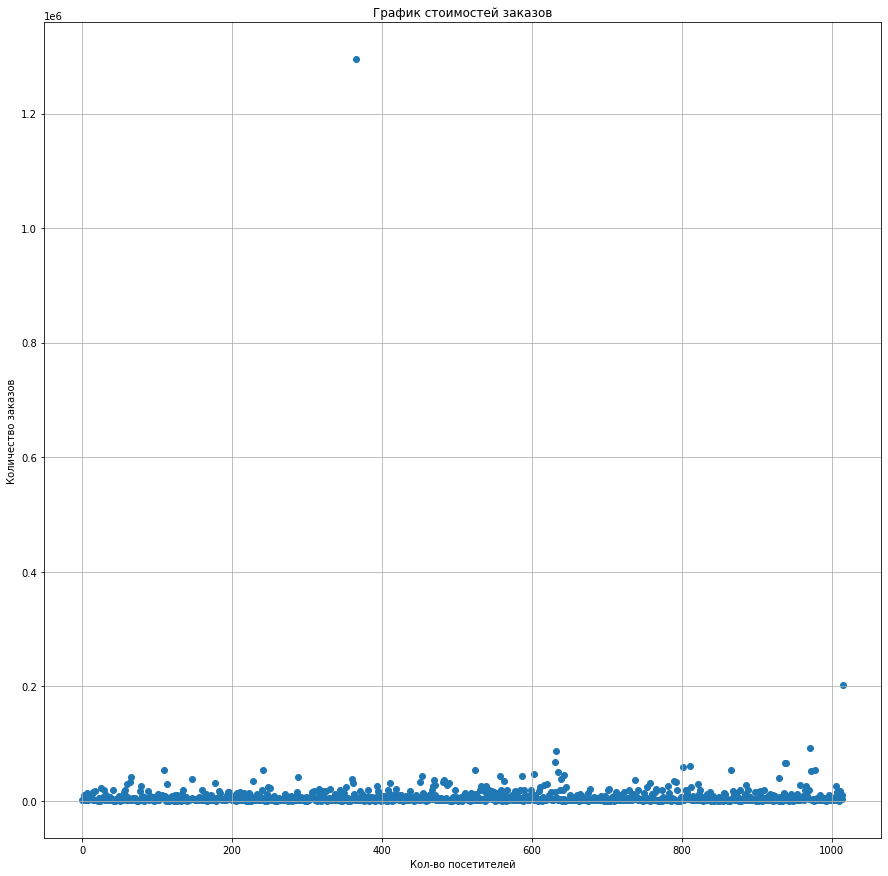

In [50]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(15, 15))
plt.scatter(x_values, orders['revenue'])
plt.grid(True)
plt.xlabel('Кол-во посетителей')
plt.ylabel('Количество заказов')
plt.title('График стоимостей заказов')
plt.show()

Заказов стоимостью выше 50 000 не так уж и много. Аномальными кажутся значения стоимости 200 000 и >1 200 000. Вероятно, выбросы.

#### 95-й и 99-й перцентили стоимости заказов

In [51]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


In [52]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B
10,3649131742,879864040,2019-08-15,4008,A


Не более 5% заказов имеют стоимость выше 28 000. И не более 1% имеют стоимость более 58 000. 
<br> Границу аномальных значений установим на уровне 50 000. 

#### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным


Выдвигаем нулевую и альтернативную гипотезы:
    <br>H0 - Статистически значимых различий в конверсии между группами нет</br>
    <br>H1 - Статистически значимые различия в конверсии между группами присутствуют</br>



In [53]:
# создадим новую переменную visitorsADaily - количество посетителей в день для группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# создадим новую переменную visitorsACummulative - рассчитаем кумулятивное значение количества посетителей
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
# спроделаем тоже самое для группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# создадим новую переменную ordersADaily - стоимость заказов и количество заказов в день для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# создадим новую переменную ordersACummulative - рассчитаем кумулятивные значения стоимости и количества заказов
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# тоже самое для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# создадим переменную data и соединим все таблицы
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [54]:
# создадим переменные ordersByUsersA и ordersByUsersB 
# где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
# создадим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. 
# А пользователям без заказов — нули. 
sampleA = pd.concat\
([ordersByUsersA['orders'],
  pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat\
([ordersByUsersB['orders'],
  pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
# посчитаем статистическую значимость
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())\
                       /(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.011
0.160



P-value меньше 0.05. Соответственно, нулевую гипотезу отвергаем.
По "сырым данным" можно предположить, что в среднем количестве заказов на посетителя между группами присутствует значимые статистические различия. Относительное различие в среднем между группами 16%

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.


Выдвигаем нулевую и альтернативную гипотезы:
    <br>H0 - Статистически значимых различий в среднем чеке заказа между группами нет</br>
    <br>H1 - Статистически значимые различия в среднем чеке заказа между группами присутствуют</br>


In [55]:
# посчитаем статистическую значимость
print('{0:.3f}'\
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'\
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


P-value намного больше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
<br> Средний чек группы B значительно выше среднего чека группы A.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.


Выдвигаем нулевую и альтернативную гипотезы:
    <br>H0 - Статистически значимых различий в среднем чеке заказа между группами нет</br>
    <br>H1 - Статистически значимые различия в среднем чеке заказа между группами присутствуют</br>


In [57]:
# для начала приступим к подготовке "очищенных" данных
# создадим датафреймы клиентов с большим количеством заказов и клиентов с аномально дорогими заказами
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
# объединим 2 датафрейма, удалим дубликаты и отсортируем, чтобы получить множество аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()

1099    148427295
33      249864742
58      611059232
1137    759473111
949     887908475
dtype: int64

In [58]:
# рассчитаем статистическую значимость без учёта "аномальных" данных
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.939
0.011


P-value увеличился, но и разница между сегментами сократилась с 26% до 1,9%.
<br> Общие выводы не изменились, но можно увидеть, как сильно аномалии влияют на результаты A/B теста</br>
<br> Средний чек группы B выше среднего чека группы A, но, уже не так значительно</br>


P-value увеличился, но и разница между сегментами сократилась с 26% до 1,1%.
Общие выводы не изменились, но можно увидеть, как сильно аномалии влияют на результаты A/B теста
Средний чек группы B выше среднего чека группы A, но, уже не так значительно


#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами  по «очищенным» данным

In [59]:
# создадим переменные, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# рассчитаем статистическую значимость без учёта "аномальных" данных 
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00561
0.198



P-value стал еще меньше 0.05. Соответственно, нулевую гипотезу отвергаем. По "очищенным данным" можно предположить, что в среднем количестве заказов на посетителя между группами присутствует значимые статистические различия. Относительное различие увеличилось и в среднем между группами - 19.8%


#### Вывод:

Присутствует статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после удаления аномалий;
<br> Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;</br>
<br> По графику среднего количества заказов можно утверждать, что группа В лидировало бОльшую часть времени;</br>
<br> График среднего чека колеблется </br>
<br> Таким образом, можно зафиксировать победу группы В и остановить тест. Т.к. присутствуют статистически значимое относительное различие по "очищенным" данным между группой В и А  - 18.2% в пользу группы В. 

### Общий вывод

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки компании.
<br> В процессе, была проведена приоритизация гипотез, запущен A/B-тест и проанализированы результаты.</br>
<br>Представленные данные A/B-теста включают в себя информацию за август 2019 года. </br>
<br>В данном проекта была проведена предобработка данных для приведения информации к нужному типу/формату</br>
<br><b>Приоритизация гипотез:</b></br>
<br>В соответствии с фреймворком ICE, самой перспективной гипотезой является <i>"Запустить акцию, дающую скидку на товар в день рождения" </i>с показателем 16.2.</br>
<br>В соответствии с фреймворком RICE, самой перспективной гипотезой является <i>"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"</i> с показателем 112.</br>
<br>В первую очередь, разница в приоритизации гипотез произошла по причине учёта показателя охвата Reach.  В данном случае, победившая гипотеза по RICE имеет самый большой показатель охвата пользователей. </br>
<br>Самая неперспективная гипотеза - <i>"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"</i> и её внедрение наименее вероятно</br>
<br><b>Анализ A/B-теста</b></br>
<br>При анализе кумулятивной выручки по группам, на протяжении всего теста, лидировала группа В с резким увеличением разрыва 13го августа. Это, в первую очередь, произошло из-за аномального значения стоимости продажи - 1 200 000.</br>
<br>Анализ кумулятивного среднего чека показал, что наблюдались колебания на протяжении половины периода, и, затем, снова резкое увеличение показателя у группы В. Причина аналогична.</br>
<br>Анализ кумулятивного среднего количества заказов на посетителя по группам показал, что начиная с 6 августа, лидировала (с постепенным увеличением разрыва) В группа.</br>
<br> С помощью графика количества заказов по пользователем удалось определить вероятное наличие аномальных значений в датасете.</br> Определили, что пользователи с 3 и более заказами являются аномальными.
<br> Границу аномальных значений по стоимости заказов в ходе анализа, была  установлена на уровне 50 000.</br>
<br> Было определно, что присутствует статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после удаления аномалий.
Не было определено статистически значимое различие по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
<br>Была зафиксирована однозначная победа группы В. Относительное различие по "очищенным" данным между группой В и А установлено в размере 18.2% в пользу группы В.</br>
